In [19]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns
from functools import reduce
import numpy as np

# Data Description

In [20]:
pd.options.display.max_columns = 150

In [21]:
Health_Outcomes = pd.read_csv('./Data/Processed_Data/Domain/Health_Outcomes.csv')
Health_Outcomes.head()

,GeoID,ARTHRITIS,BPHIGH,CANCER,CASTHMA,CHD,COPD,DEPRESSION,DIABETES,HIGHCHOL,KIDNEY,OBESITY,STROKE,TEETHLOST
0,36005000100,11.4,28.6,2.1,11.1,3.8,5.5,15.1,9.4,22.1,2.3,34.5,2.7,29.4
1,36005000200,18.0,30.3,4.9,10.4,5.2,5.2,15.2,13.6,30.1,3.3,31.8,3.1,15.5
2,36005000400,15.6,26.8,4.5,9.8,3.9,3.9,14.5,11.0,28.0,2.7,30.2,2.4,10.6
3,36005001600,22.2,35.8,5.7,11.8,7.0,7.3,16.4,16.8,32.2,4.3,35.0,4.3,19.3
4,36005001900,15.2,28.1,3.5,10.8,4.7,5.4,16.6,11.6,26.1,2.9,33.9,2.8,18.6


In [22]:
len(Health_Outcomes)

2085

In [23]:
OBESITY = Health_Outcomes[['GeoID','OBESITY']]

In [24]:
BE = pd.read_csv('./Data/Processed_Data/Without15/BEE.csv', index_col=0)
E = pd.read_csv('./Data/Processed_Data/Domain/Education.csv')
NE = pd.read_csv('./Data/Processed_Data/Domain/Environment.csv')
SE = pd.read_csv('./Data/Processed_Data/Domain/Social_Economic.csv')

In [25]:
BE

,BE_JFood_x,BE_Restaurant,BE_doctors,BE_pharmacy,BE_gym,BE_attraction,BE_TreeD,GeoID,BE_LandMIX,BE_nodeD,BE_JFood_y,BE_HFood,BE_WalkVSDrive,BE_Transit,BE_Park
2048,0.0,0.0,0.0,0.0,0.0,0.0,4.692669,36085000900,0.002697,0.000000,6.857143,0.000000,0.328955,20.000000,16.629548
1190,3.0,20.0,0.0,0.0,2.0,0.0,7.496095,36061009800,0.005393,0.822742,133.500000,15.800000,0.368258,134.900000,54.409663
1194,3.0,7.0,0.0,0.0,1.0,1.0,2.387500,36061010200,0.000000,0.561765,182.928571,18.142857,0.365247,185.357143,136.719407
1196,6.0,22.0,0.0,1.0,0.0,2.0,4.391976,36061010400,0.000000,0.841017,204.000000,17.333333,0.436770,188.333333,143.608206
1206,16.0,23.0,0.0,2.0,1.0,1.0,0.138219,36061011300,0.000000,1.497376,253.833333,17.666667,0.352573,186.833333,17.964456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.0,0.0,0.0,0.0,0.0,0.0,4.443286,36005011502,0.000000,2.104707,8.629630,1.740741,0.309789,24.037037,114.081115
2131,0.0,0.0,0.0,0.0,0.0,0.0,3.870074,36085023900,0.003338,0.000000,0.633333,1.266667,0.291297,0.266667,7.303604
2127,0.0,0.0,0.0,0.0,0.0,0.0,1.600761,36085022300,0.000000,0.000000,0.576923,0.730769,0.281359,0.000000,11.464986
2122,0.0,0.0,0.0,0.0,0.0,0.0,2.269553,36085020700,0.001522,0.000000,0.000000,0.000000,0.318260,1.117647,15.741354


In [26]:
# merge data
dfs = [BE, E, NE, SE, OBESITY]
data  = reduce(lambda left,right: pd.merge(left,right, on='GeoID'), dfs)
data

,BE_JFood_x,BE_Restaurant,BE_doctors,BE_pharmacy,BE_gym,BE_attraction,BE_TreeD,GeoID,BE_LandMIX,BE_nodeD,BE_JFood_y,BE_HFood,BE_WalkVSDrive,BE_Transit,BE_Park,E_Advance,E_PreS,E_HighS,NE_Tem,NE_Ozone,NE_PM25,SE_Unemploy,SE_Income,SE_Cash,SE_Food,SE_Insurance,SE_Poverty,SE_English,OBESITY
0,0.0,0.0,0.0,0.0,0.0,0.0,4.692669,36085000900,0.002697,0.000000,6.857143,0.000000,0.328955,20.000000,16.629548,42.6,14.6,100.0,94.076023,41.671695,8.968913,12.6,50543.0,15.9,29.7,96.2,26.8,8.0,38.0
1,3.0,20.0,0.0,0.0,2.0,0.0,7.496095,36061009800,0.005393,0.822742,133.500000,15.800000,0.368258,134.900000,54.409663,76.2,100.0,100.0,94.614873,41.693379,9.237539,1.6,129167.0,0.0,0.0,96.4,5.6,1.6,17.3
2,0.0,6.0,0.0,0.0,0.0,2.0,9.061069,36061013000,0.000000,1.430695,45.000000,15.428571,0.384499,69.071429,449.651750,85.0,0.0,100.0,91.815628,41.777548,9.258808,5.4,196964.0,0.0,2.1,96.7,1.7,1.3,17.2
3,3.0,27.0,0.0,3.0,2.0,0.0,9.227739,36061014000,0.000000,0.429723,46.928571,20.642857,0.356934,61.000000,356.646617,85.6,83.0,100.0,93.280909,41.799333,9.250015,2.6,137109.0,2.5,3.0,100.0,3.2,1.2,17.6
4,1.0,3.0,0.0,0.0,0.0,0.0,5.903901,36061018400,0.009657,2.631584,55.615385,14.769231,0.401948,68.769231,192.509142,25.7,21.8,100.0,94.768376,41.959653,9.243206,13.3,22738.0,9.6,34.7,96.2,37.3,20.1,31.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0.0,0.0,0.0,0.0,0.0,0.0,4.443286,36005011502,0.000000,2.104707,8.629630,1.740741,0.309789,24.037037,114.081115,10.9,67.4,95.9,96.235751,42.364276,9.050111,12.9,17656.0,12.8,60.1,92.8,47.8,27.9,37.7
1999,0.0,0.0,0.0,0.0,0.0,0.0,3.870074,36085023900,0.003338,0.000000,0.633333,1.266667,0.291297,0.266667,7.303604,18.2,27.1,100.0,97.579748,41.917641,8.890193,4.8,83883.0,6.8,11.3,91.4,13.2,7.0,33.7
2000,0.0,0.0,0.0,0.0,0.0,0.0,1.600761,36085022300,0.000000,0.000000,0.576923,0.730769,0.281359,0.000000,11.464986,24.2,38.3,100.0,93.917541,41.914397,8.919587,7.4,63750.0,5.4,16.5,95.2,23.8,8.4,37.8
2001,0.0,0.0,0.0,0.0,0.0,0.0,2.269553,36085020700,0.001522,0.000000,0.000000,0.000000,0.318260,1.117647,15.741354,12.1,46.2,97.4,96.268642,41.880061,8.926979,5.4,33670.0,11.2,27.8,82.5,31.1,7.4,38.5


In [27]:
data = data.set_index('GeoID')
data.head()

,BE_JFood_x,BE_Restaurant,BE_doctors,BE_pharmacy,BE_gym,BE_attraction,BE_TreeD,BE_LandMIX,BE_nodeD,BE_JFood_y,BE_HFood,BE_WalkVSDrive,BE_Transit,BE_Park,E_Advance,E_PreS,E_HighS,NE_Tem,NE_Ozone,NE_PM25,SE_Unemploy,SE_Income,SE_Cash,SE_Food,SE_Insurance,SE_Poverty,SE_English,OBESITY
GeoID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36085000900,0.0,0.0,0.0,0.0,0.0,0.0,4.692669,0.002697,0.000000,6.857143,0.000000,0.328955,20.000000,16.629548,42.6,14.6,100.0,94.076023,41.671695,8.968913,12.6,50543.0,15.9,29.7,96.2,26.8,8.0,38.0
36061009800,3.0,20.0,0.0,0.0,2.0,0.0,7.496095,0.005393,0.822742,133.500000,15.800000,0.368258,134.900000,54.409663,76.2,100.0,100.0,94.614873,41.693379,9.237539,1.6,129167.0,0.0,0.0,96.4,5.6,1.6,17.3
36061013000,0.0,6.0,0.0,0.0,0.0,2.0,9.061069,0.000000,1.430695,45.000000,15.428571,0.384499,69.071429,449.651750,85.0,0.0,100.0,91.815628,41.777548,9.258808,5.4,196964.0,0.0,2.1,96.7,1.7,1.3,17.2
36061014000,3.0,27.0,0.0,3.0,2.0,0.0,9.227739,0.000000,0.429723,46.928571,20.642857,0.356934,61.000000,356.646617,85.6,83.0,100.0,93.280909,41.799333,9.250015,2.6,137109.0,2.5,3.0,100.0,3.2,1.2,17.6
36061018400,1.0,3.0,0.0,0.0,0.0,0.0,5.903901,0.009657,2.631584,55.615385,14.769231,0.401948,68.769231,192.509142,25.7,21.8,100.0,94.768376,41.959653,9.243206,13.3,22738.0,9.6,34.7,96.2,37.3,20.1,31.6


In [28]:
# geo data
ct2010 = gpd.read_file('./Data/Processed_Data/ct2010_geoid.geojson')
ct2010.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,GeoID,geometry
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,36085000900,"POLYGON ((-74.07921 40.64343, -74.07914 40.643..."
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200308,36061009800,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
2,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,36061010200,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
3,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,36061010400,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
4,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860640,36061011300,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."


In [30]:
dataGeo = pd.merge(data, ct2010[['GeoID','ntaname', 'boro_name','geometry']], on='GeoID').set_index('GeoID')
dataGeo =gpd.GeoDataFrame(dataGeo, geometry=dataGeo.geometry, crs=4326)
dataGeo.head()

,BE_JFood_x,BE_Restaurant,BE_doctors,BE_pharmacy,BE_gym,BE_attraction,BE_TreeD,BE_LandMIX,BE_nodeD,BE_JFood_y,BE_HFood,BE_WalkVSDrive,BE_Transit,BE_Park,E_Advance,E_PreS,E_HighS,NE_Tem,NE_Ozone,NE_PM25,SE_Unemploy,SE_Income,SE_Cash,SE_Food,SE_Insurance,SE_Poverty,SE_English,OBESITY,ntaname,boro_name,geometry
GeoID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36085000900,0.0,0.0,0.0,0.0,0.0,0.0,4.692669,0.002697,0.000000,6.857143,0.000000,0.328955,20.000000,16.629548,42.6,14.6,100.0,94.076023,41.671695,8.968913,12.6,50543.0,15.9,29.7,96.2,26.8,8.0,38.0,West New Brighton-New Brighton-St. George,Staten Island,"POLYGON ((-74.07921 40.64343, -74.07914 40.643..."
36061009800,3.0,20.0,0.0,0.0,2.0,0.0,7.496095,0.005393,0.822742,133.500000,15.800000,0.368258,134.900000,54.409663,76.2,100.0,100.0,94.614873,41.693379,9.237539,1.6,129167.0,0.0,0.0,96.4,5.6,1.6,17.3,Turtle Bay-East Midtown,Manhattan,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
36061013000,0.0,6.0,0.0,0.0,0.0,2.0,9.061069,0.000000,1.430695,45.000000,15.428571,0.384499,69.071429,449.651750,85.0,0.0,100.0,91.815628,41.777548,9.258808,5.4,196964.0,0.0,2.1,96.7,1.7,1.3,17.2,Upper East Side-Carnegie Hill,Manhattan,"POLYGON ((-73.96148 40.77432, -73.96194 40.773..."
36061014000,3.0,27.0,0.0,3.0,2.0,0.0,9.227739,0.000000,0.429723,46.928571,20.642857,0.356934,61.000000,356.646617,85.6,83.0,100.0,93.280909,41.799333,9.250015,2.6,137109.0,2.5,3.0,100.0,3.2,1.2,17.6,Upper East Side-Carnegie Hill,Manhattan,"POLYGON ((-73.95495 40.77750, -73.95541 40.776..."
36061018400,1.0,3.0,0.0,0.0,0.0,0.0,5.903901,0.009657,2.631584,55.615385,14.769231,0.401948,68.769231,192.509142,25.7,21.8,100.0,94.768376,41.959653,9.243206,13.3,22738.0,9.6,34.7,96.2,37.3,20.1,31.6,East Harlem North,Manhattan,"POLYGON ((-73.94181 40.80124, -73.94227 40.800..."


In [35]:
dataGeo.sort_values(by='OBESITY', ascending=False)[['OBESITY','ntaname','boro_name']].head(5)

,OBESITY,ntaname,boro_name
GeoID,,,
36085013301,45.5,West New Brighton-New Brighton-St. George,Staten Island
36005014701,43.3,Claremont-Bathgate,Bronx
36005014300,42.7,East Concourse-Concourse Village,Bronx
36005005300,42.2,University Heights-Morris Heights,Bronx
36085002900,42.0,Stapleton-Rosebank,Staten Island


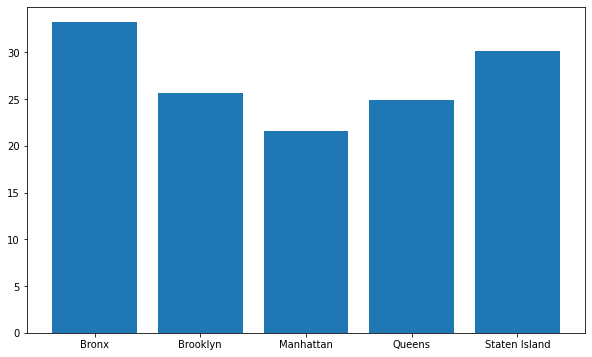

In [44]:
plt.subplots(1,1, figsize=(10,6))
plt.bar(dataGeo.groupby('boro_name').agg({'OBESITY':'mean'}).index
      ,dataGeo.groupby('boro_name').agg({'OBESITY':'mean'}).OBESITY)
plt.show()

## Social & Economic

**SE_Unemploy:** Unemployment rate
    
**SE_Income:** Median household incomes(dollars)

**SE_Cash:** Percent households receiving cash public assistance

**SE_Food:** Percent households receiving Food Stamps/Supplemental Nutrition Assistance Program

**SE_Insurance:** Percent individuals with health insurance coverage

**SE_Poverty:** Percent individuals ages 18 years and over with incomes below the federal poverty level in the past 12 months

**SE_English:** Percent citizens 18 years old and over speak English less than very well
    
## Education(E)

**E_Advance:** Population 25 years and over who has Bachelor's degree or higher

**E_PreS:** Population 3 to 4 years olds enrolled in school

**E_HighS:** Population 15 to 17 year olds enrolled in school

## Natural Environment (NE)
**NE_Tem:** Typical summer day surface temperature

**NE_PM25:** PM2.5 levels in air, µg/m3 annual avg.

**NE_Ozone:** Ozone summer seasonal avg. of daily maximum 8-hour concentration in air in parts per billion

## Built Environment (BE)
**BE_TreeD:** Street trees density (trees per acre)

**BE_LandMIX:** Land-use mix of commercial, residential and open space uses

**BE_nodeD:** Intersection density in terms of pedestrian-oriented intersections.(number of intersection per acre)

**BE_JFood:** Numbers of fast food restaurants within 15 min walk distance (0.8 mile)

**BE_HFood:** Numbers of supermarkets within 15 min walk distance (0.8 mile)

**BE_WalkVSDrive:** The area of sidewalks divided by the sum of the area of the roadway segment and the area sidewalks in a given census tract

**BE_Transit:** Numbers of Transits(train, subway, bus, or ferry stop.) within 15 min walk distance (0.8 mile)

**BE_Park:** Area(arce) of parks within 15 min walk distance (0.8 mile)

In [11]:
dataGeo.describe()

,BE_TreeD,BE_LandMIX,BE_nodeD,BE_JFood,BE_HFood,BE_WalkVSDrive,BE_Transit,BE_Park,E_Advance,E_PreS,E_HighS,NE_Tem,NE_Ozone,NE_PM25,SE_Unemploy,SE_Income,SE_Cash,SE_Food,SE_Insurance,SE_Poverty,SE_English,OBESITY
count,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000
mean,5.014244,0.003176,1.217730,22.471835,6.659842,0.364496,28.385223,95.843371,35.136845,62.971393,97.282876,94.608211,42.035108,8.842942,6.501697,70260.149775,4.508487,19.572092,92.417424,15.826261,18.107639,26.377683
std,1.935074,0.004975,1.090320,36.899709,6.768270,0.056445,26.225456,104.801471,20.239924,28.817686,7.193782,2.192793,0.540249,0.312602,4.274731,34325.815766,4.357176,15.480047,4.995314,10.480142,13.744256,6.196946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.085799,0.000000,0.977895,2.400000,0.000000,36.400000,83.718909,41.415744,7.797531,0.000000,9740.000000,0.000000,0.000000,58.000000,0.400000,0.000000,13.100000
25%,3.766567,0.000000,0.475426,3.276820,1.916667,0.330662,12.024590,23.406843,20.500000,42.900000,100.000000,93.266750,41.539736,8.635181,3.600000,47289.500000,1.400000,7.400000,90.100000,8.000000,6.900000,20.900000
50%,4.988072,0.000000,0.837227,8.857143,4.062500,0.360766,20.466667,54.235921,30.300000,65.100000,100.000000,94.837580,41.876424,8.892654,5.500000,65698.000000,3.200000,15.100000,93.300000,13.100000,15.500000,26.000000
75%,6.266960,0.005395,1.653803,23.519231,10.000000,0.393796,36.000000,130.995498,44.550000,87.150000,100.000000,96.179671,42.487053,9.100888,8.200000,86051.500000,6.400000,27.800000,96.000000,21.400000,25.800000,31.250000
max,11.786618,0.028408,9.439382,304.857143,45.571429,0.705531,200.384615,540.869893,97.000000,100.000000,100.000000,100.162658,43.600054,9.297862,39.100000,250000.000000,37.300000,78.000000,100.000000,69.800000,80.700000,45.500000


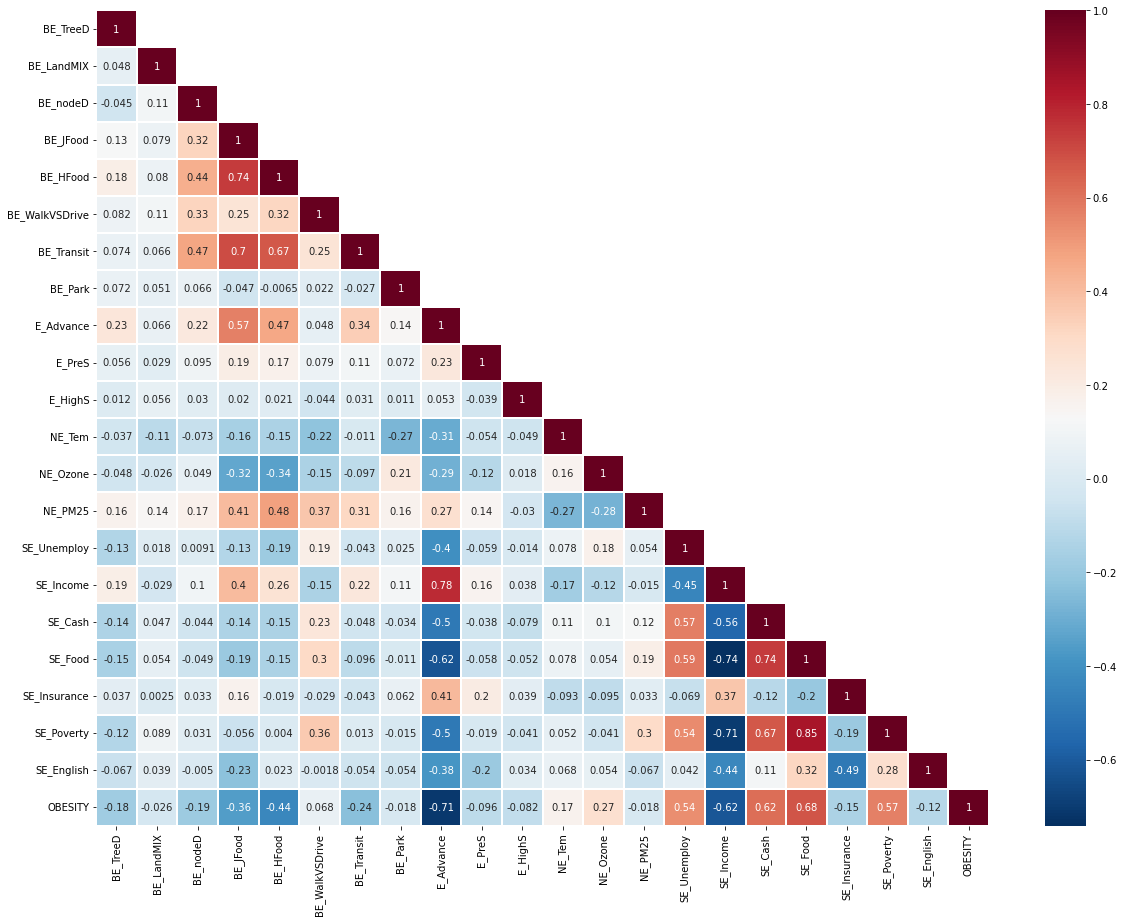

In [12]:
corr = dataGeo.iloc[:,:-1].corr()

fig, ax = plt.subplots(1,1, figsize=(20,15))

mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, cmap="RdBu_r", annot=True, mask=mask, linewidths=0.3)
plt.show()

In [79]:
dataGeo.columns[0:16]

Index(['BE_JFood_x', 'BE_Restaurant', 'BE_doctors', 'BE_pharmacy', 'BE_gym',
       'BE_attraction', 'BE_TreeD', 'BE_LandMIX', 'BE_nodeD', 'BE_JFood_y',
       'BE_HFood', 'BE_WalkVSDrive', 'BE_Transit', 'BE_Park', 'E_Advance',
       'E_PreS'],
      dtype='object')

In [86]:
dataGeo.columns[16:-4]

Index(['E_HighS', 'NE_Tem', 'NE_Ozone', 'NE_PM25', 'SE_Unemploy', 'SE_Income',
       'SE_Cash', 'SE_Food', 'SE_Insurance', 'SE_Poverty', 'SE_English'],
      dtype='object')

In [ ]:
dataGeo.columns[16:-4]

/Users/taoliang/opt/anaconda3/envs/MLC/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/taoliang/opt/anaconda3/envs/MLC/lib/python3.7/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


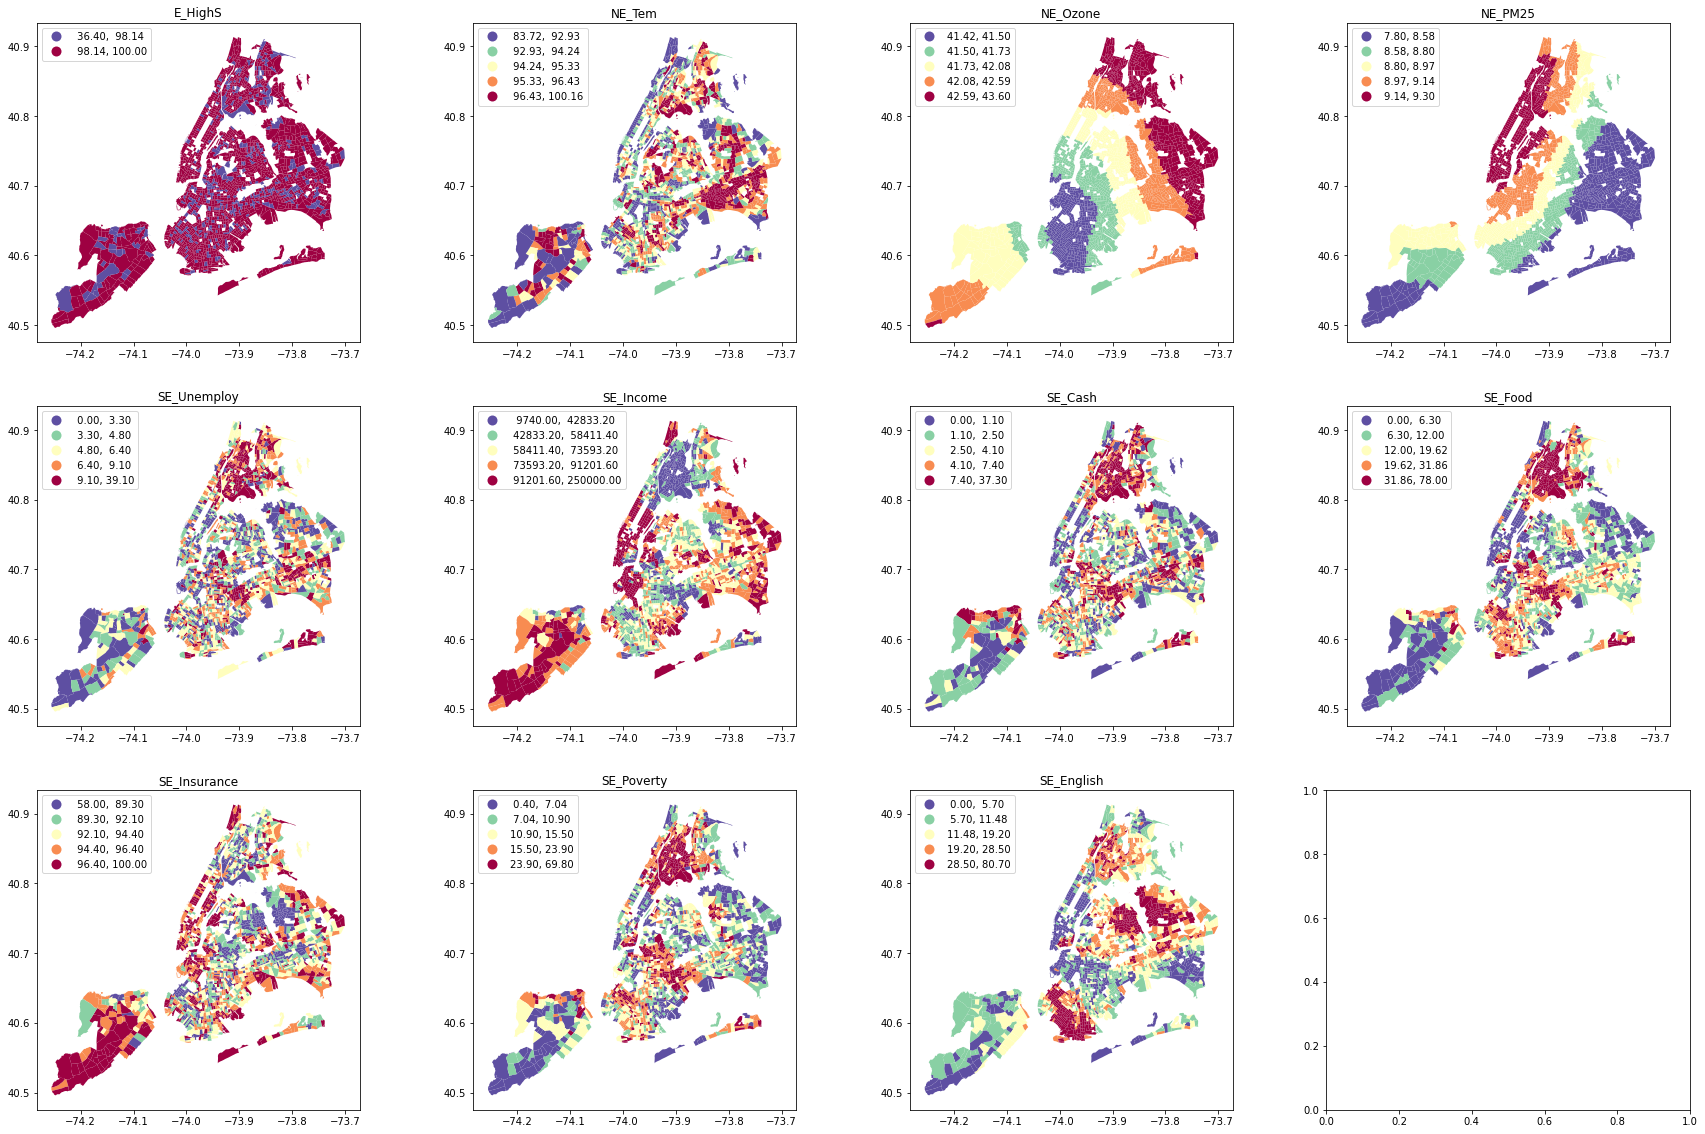

In [87]:
fig, ax = plt.subplots(3,4, figsize=(30,20))

a = dataGeo.columns[16:-4]

for i,j in enumerate(a):
    dataGeo.plot(column=j, cmap='Spectral_r', ax=ax[i//4][i%4],
                              legend=True, scheme='Quantiles', k=5,
                              figsize=(5,5), legend_kwds={'loc': 'upper left'})
    label = j
    ax[i//4][i%4].set_title(label)

plt.show()

In [84]:
fig.savefig('MLC_HeatMap.jpg', dpi=600,bbox_inches='tight')

In [88]:
fig.savefig('MLC_HeatMap_2.jpg', dpi=600,bbox_inches='tight')

# Analysis

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [17]:
data = data.set_index('GeoID')
data

,BE_JFood_x,BE_Restaurant,BE_doctors,BE_pharmacy,BE_gym,BE_attraction,BE_TreeD,BE_LandMIX,BE_nodeD,BE_JFood_y,BE_HFood,BE_WalkVSDrive,BE_Transit,BE_Park,E_Advance,E_PreS,E_HighS,NE_Tem,NE_Ozone,NE_PM25,SE_Unemploy,SE_Income,SE_Cash,SE_Food,SE_Insurance,SE_Poverty,SE_English,OBESITY
GeoID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36085000900,0.0,0.0,0.0,0.0,0.0,0.0,4.692669,0.002697,0.000000,6.857143,0.000000,0.328955,20.000000,16.629548,42.6,14.6,100.0,94.076023,41.671695,8.968913,12.6,50543.0,15.9,29.7,96.2,26.8,8.0,38.0
36061009800,3.0,20.0,0.0,0.0,2.0,0.0,7.496095,0.005393,0.822742,133.500000,15.800000,0.368258,134.900000,54.409663,76.2,100.0,100.0,94.614873,41.693379,9.237539,1.6,129167.0,0.0,0.0,96.4,5.6,1.6,17.3
36061013000,0.0,6.0,0.0,0.0,0.0,2.0,9.061069,0.000000,1.430695,45.000000,15.428571,0.384499,69.071429,449.651750,85.0,0.0,100.0,91.815628,41.777548,9.258808,5.4,196964.0,0.0,2.1,96.7,1.7,1.3,17.2
36061014000,3.0,27.0,0.0,3.0,2.0,0.0,9.227739,0.000000,0.429723,46.928571,20.642857,0.356934,61.000000,356.646617,85.6,83.0,100.0,93.280909,41.799333,9.250015,2.6,137109.0,2.5,3.0,100.0,3.2,1.2,17.6
36061018400,1.0,3.0,0.0,0.0,0.0,0.0,5.903901,0.009657,2.631584,55.615385,14.769231,0.401948,68.769231,192.509142,25.7,21.8,100.0,94.768376,41.959653,9.243206,13.3,22738.0,9.6,34.7,96.2,37.3,20.1,31.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36005011502,0.0,0.0,0.0,0.0,0.0,0.0,4.443286,0.000000,2.104707,8.629630,1.740741,0.309789,24.037037,114.081115,10.9,67.4,95.9,96.235751,42.364276,9.050111,12.9,17656.0,12.8,60.1,92.8,47.8,27.9,37.7
36085023900,0.0,0.0,0.0,0.0,0.0,0.0,3.870074,0.003338,0.000000,0.633333,1.266667,0.291297,0.266667,7.303604,18.2,27.1,100.0,97.579748,41.917641,8.890193,4.8,83883.0,6.8,11.3,91.4,13.2,7.0,33.7
36085022300,0.0,0.0,0.0,0.0,0.0,0.0,1.600761,0.000000,0.000000,0.576923,0.730769,0.281359,0.000000,11.464986,24.2,38.3,100.0,93.917541,41.914397,8.919587,7.4,63750.0,5.4,16.5,95.2,23.8,8.4,37.8


In [19]:
X1 = data.iloc[:,14:-1]

In [20]:
x2 = data.iloc[:,:-1]

In [22]:
y = data.OBESITY

## All indicators

0.8766994393780398 0    180
Name: N_estimator, dtype: int64


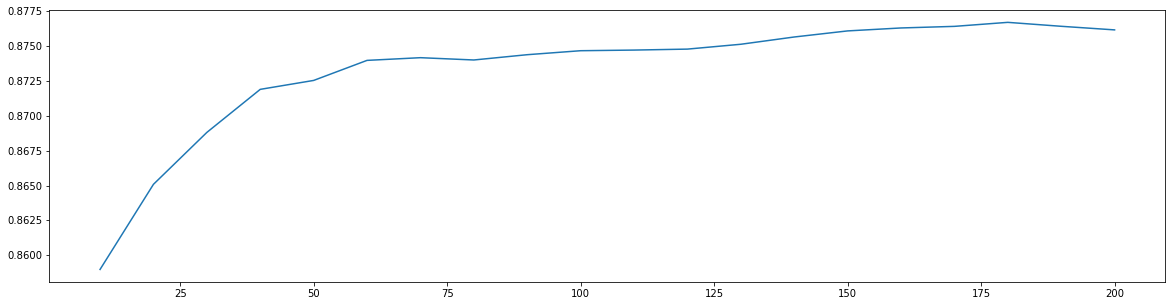

In [23]:
# n_estimators

scorel = pd.DataFrame()
for i in range(10,201,10):
    rfs = RandomForestRegressor(n_estimators=i,
    n_jobs=-1,
    random_state=90)

    score = cross_val_score(rfs,x2,y,cv=10).mean()
    scorel = scorel.append(pd.DataFrame({'N_estimator':[i], 'Score':[score]}))
    
print(max(scorel.Score), scorel.loc[scorel.Score == max(scorel.Score),'N_estimator'])
plt.figure(figsize=[20,5])
plt.plot(range(10,201,10), scorel.Score)
plt.show()

0.8768104334550619 0    21
Name: N_estimator, dtype: int64


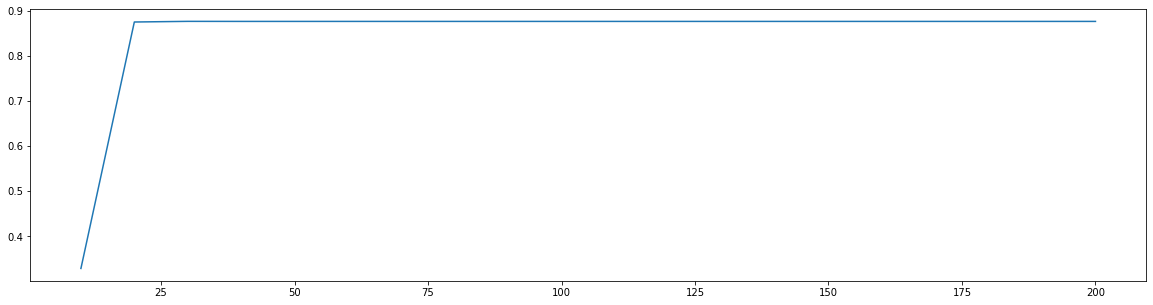

In [25]:
# max_depth
scorel = pd.DataFrame()
for i in range(1,201,10):
    rfs = RandomForestRegressor(n_estimators=180,
                                max_depth=i,
                                n_jobs=-1,
                                random_state=90)

    score = cross_val_score(rfs,x2,y,cv=10).mean()
    scorel = scorel.append(pd.DataFrame({'i':[i], 'Score':[score]}))
    
print(max(scorel.Score), scorel.loc[scorel.Score == max(scorel.Score),'i'])
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10), scorel.Score)
plt.show()

0.8770277189272253 0    16
Name: i, dtype: int64


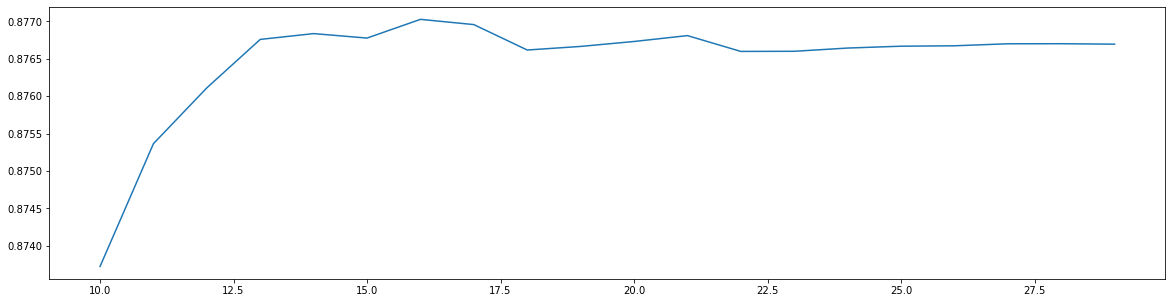

In [27]:
# max_depth
scorel = pd.DataFrame()
for i in range(10,30,1):
    rfs = RandomForestRegressor(n_estimators=180,
                                max_depth=i,
                                n_jobs=-1,
                                random_state=90)

    score = cross_val_score(rfs,x2,y,cv=10).mean()
    scorel = scorel.append(pd.DataFrame({'i':[i], 'Score':[score]}))
    
print(max(scorel.Score), scorel.loc[scorel.Score == max(scorel.Score),'i'])
plt.figure(figsize=[20,5])
plt.plot(range(10,30,1), scorel.Score)
plt.show()

0.8770277189272255 0    2
Name: i, dtype: int64


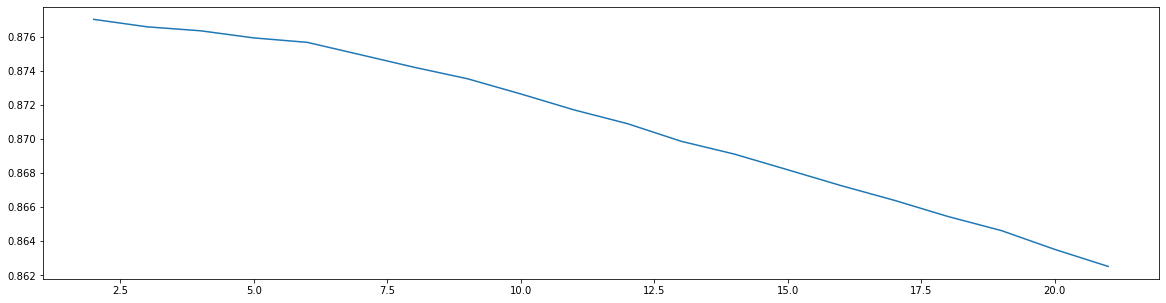

In [28]:
# min_samples_split
scorel = pd.DataFrame()
for i in range(2,2+20,1):
    rfs = RandomForestRegressor(n_estimators=180,
                                max_depth=16,
                                min_samples_split=i,
                                n_jobs=-1,
                                random_state=90)

    score = cross_val_score(rfs,x2,y,cv=10).mean()
    scorel = scorel.append(pd.DataFrame({'i':[i], 'Score':[score]}))
    
print(max(scorel.Score), scorel.loc[scorel.Score == max(scorel.Score),'i'])
plt.figure(figsize=[20,5])
plt.plot(range(2,2+20,1), scorel.Score)
plt.show()

In [29]:
# best model
rfs = RandomForestRegressor(n_estimators=180,
                                max_depth=16,
                                min_samples_split=2,
                                n_jobs=-1,
                                random_state=90).fit(x2,y)

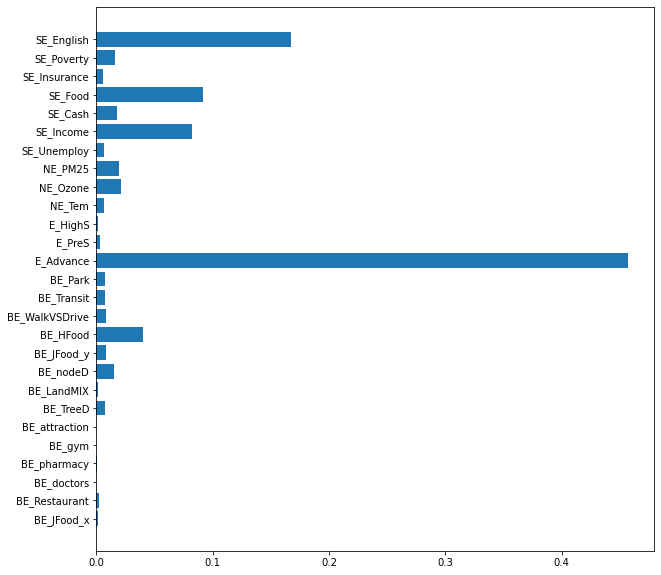

In [30]:
plot, ax = plt.subplots(1,1,figsize = (10,10))
plt.barh(x2.columns, rfs.feature_importances_)
plt.show()

## without BE

0.8603696587605908 0    190
Name: N_estimator, dtype: int64


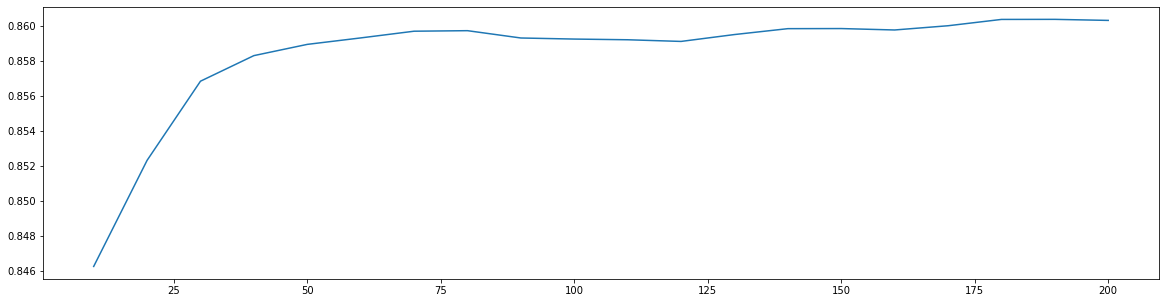

In [32]:
# n_estimators

scorel = pd.DataFrame()
for i in range(10,201,10):
    rfs = RandomForestRegressor(n_estimators=i,
    n_jobs=-1,
    random_state=90)

    score = cross_val_score(rfs,X1,y,cv=10).mean()
    scorel = scorel.append(pd.DataFrame({'N_estimator':[i], 'Score':[score]}))
    
print(max(scorel.Score), scorel.loc[scorel.Score == max(scorel.Score),'N_estimator'])
plt.figure(figsize=[20,5])
plt.plot(range(10,201,10), scorel.Score)
plt.show()

0.8603696587605908 0     31
0     41
0     51
0     61
0     71
0     81
0     91
0    101
0    111
0    121
0    131
0    141
0    151
0    161
0    171
0    181
0    191
Name: i, dtype: int64


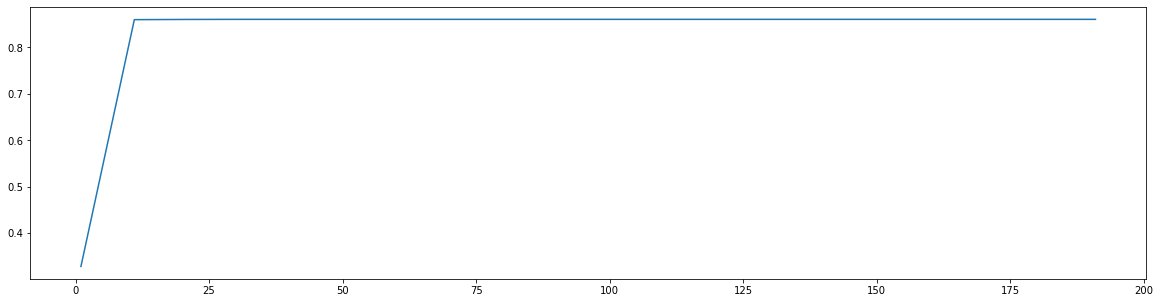

In [33]:
# max_depth
scorel = pd.DataFrame()
for i in range(1,201,10):
    rfs = RandomForestRegressor(n_estimators=190,
                                max_depth=i,
                                n_jobs=-1,
                                random_state=90)

    score = cross_val_score(rfs,X1,y,cv=10).mean()
    scorel = scorel.append(pd.DataFrame({'i':[i], 'Score':[score]}))
    
print(max(scorel.Score), scorel.loc[scorel.Score == max(scorel.Score),'i'])
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10), scorel.Score)
plt.show()

0.8604644492754826 0    22
Name: i, dtype: int64


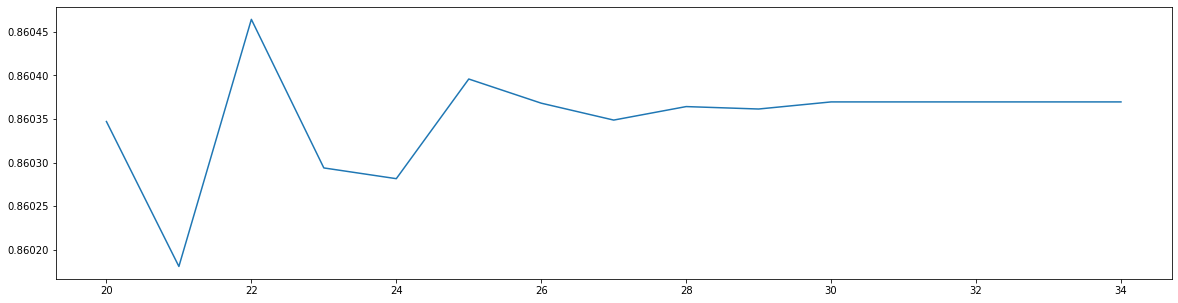

In [34]:
# max_depth
scorel = pd.DataFrame()
for i in range(20,35,1):
    rfs = RandomForestRegressor(n_estimators=190,
                                max_depth=i,
                                n_jobs=-1,
                                random_state=90)

    score = cross_val_score(rfs,X1,y,cv=10).mean()
    scorel = scorel.append(pd.DataFrame({'i':[i], 'Score':[score]}))
    
print(max(scorel.Score), scorel.loc[scorel.Score == max(scorel.Score),'i'])
plt.figure(figsize=[20,5])
plt.plot(range(20,35,1), scorel.Score)
plt.show()

0.8607490795186857 0    3
Name: i, dtype: int64


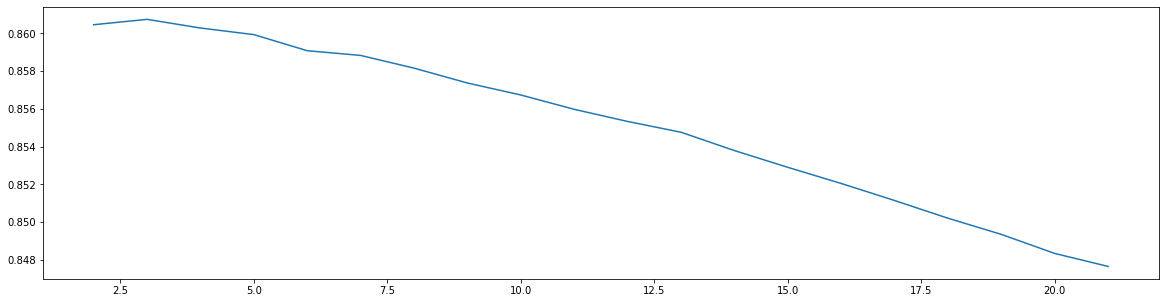

In [35]:
# min_samples_split
scorel = pd.DataFrame()
for i in range(2,2+20,1):
    rfs = RandomForestRegressor(n_estimators=190,
                                max_depth=22,
                                min_samples_split=i,
                                n_jobs=-1,
                                random_state=90)

    score = cross_val_score(rfs,X1,y,cv=10).mean()
    scorel = scorel.append(pd.DataFrame({'i':[i], 'Score':[score]}))
    
print(max(scorel.Score), scorel.loc[scorel.Score == max(scorel.Score),'i'])
plt.figure(figsize=[20,5])
plt.plot(range(2,2+20,1), scorel.Score)
plt.show()

In [38]:
# best model
rfs = RandomForestRegressor(n_estimators=190,
                                max_depth=22,
                                min_samples_split=3,
                                n_jobs=-1,
                                random_state=90).fit(X1,y)

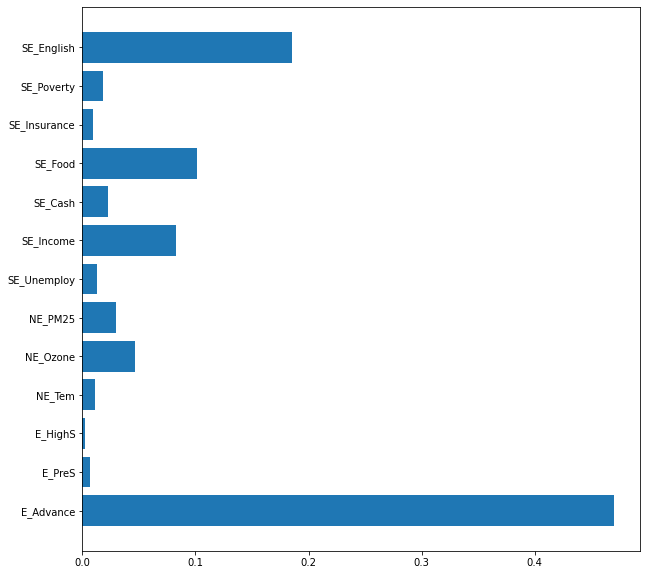

In [39]:
plot, ax = plt.subplots(1,1,figsize = (10,10))
plt.barh(X1.columns, rfs.feature_importances_)
plt.show()

In [142]:
data.to_csv('./MLCdf_Apr28.csv')

In [40]:
import statsmodels as sm
import statsmodels.formula.api as smf

In [44]:
data

,BE_JFood_x,BE_Restaurant,BE_doctors,BE_pharmacy,BE_gym,BE_attraction,BE_TreeD,BE_LandMIX,BE_nodeD,BE_JFood_y,BE_HFood,BE_WalkVSDrive,BE_Transit,BE_Park,E_Advance,E_PreS,E_HighS,NE_Tem,NE_Ozone,NE_PM25,SE_Unemploy,SE_Income,SE_Cash,SE_Food,SE_Insurance,SE_Poverty,SE_English,OBESITY
GeoID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36085000900,0.0,0.0,0.0,0.0,0.0,0.0,4.692669,0.002697,0.000000,6.857143,0.000000,0.328955,20.000000,16.629548,42.6,14.6,100.0,94.076023,41.671695,8.968913,12.6,50543.0,15.9,29.7,96.2,26.8,8.0,38.0
36061009800,3.0,20.0,0.0,0.0,2.0,0.0,7.496095,0.005393,0.822742,133.500000,15.800000,0.368258,134.900000,54.409663,76.2,100.0,100.0,94.614873,41.693379,9.237539,1.6,129167.0,0.0,0.0,96.4,5.6,1.6,17.3
36061013000,0.0,6.0,0.0,0.0,0.0,2.0,9.061069,0.000000,1.430695,45.000000,15.428571,0.384499,69.071429,449.651750,85.0,0.0,100.0,91.815628,41.777548,9.258808,5.4,196964.0,0.0,2.1,96.7,1.7,1.3,17.2
36061014000,3.0,27.0,0.0,3.0,2.0,0.0,9.227739,0.000000,0.429723,46.928571,20.642857,0.356934,61.000000,356.646617,85.6,83.0,100.0,93.280909,41.799333,9.250015,2.6,137109.0,2.5,3.0,100.0,3.2,1.2,17.6
36061018400,1.0,3.0,0.0,0.0,0.0,0.0,5.903901,0.009657,2.631584,55.615385,14.769231,0.401948,68.769231,192.509142,25.7,21.8,100.0,94.768376,41.959653,9.243206,13.3,22738.0,9.6,34.7,96.2,37.3,20.1,31.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36005011502,0.0,0.0,0.0,0.0,0.0,0.0,4.443286,0.000000,2.104707,8.629630,1.740741,0.309789,24.037037,114.081115,10.9,67.4,95.9,96.235751,42.364276,9.050111,12.9,17656.0,12.8,60.1,92.8,47.8,27.9,37.7
36085023900,0.0,0.0,0.0,0.0,0.0,0.0,3.870074,0.003338,0.000000,0.633333,1.266667,0.291297,0.266667,7.303604,18.2,27.1,100.0,97.579748,41.917641,8.890193,4.8,83883.0,6.8,11.3,91.4,13.2,7.0,33.7
36085022300,0.0,0.0,0.0,0.0,0.0,0.0,1.600761,0.000000,0.000000,0.576923,0.730769,0.281359,0.000000,11.464986,24.2,38.3,100.0,93.917541,41.914397,8.919587,7.4,63750.0,5.4,16.5,95.2,23.8,8.4,37.8


In [53]:
mod = smf.ols(formula='OBESITY ~ BE_Restaurant+BE_TreeD+BE_LandMIX+BE_nodeD+BE_HFood+BE_WalkVSDrive', data = data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                OBESITY   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     122.7
Date:                Sun, 01 May 2022   Prob (F-statistic):          2.92e-132
Time:                        17:40:41   Log-Likelihood:                -6180.7
No. Observations:                2003   AIC:                         1.238e+04
Df Residuals:                    1996   BIC:                         1.241e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.0171      0.833     26.

In [54]:
mod = smf.ols(formula='OBESITY ~ BE_LandMIX', data = data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                OBESITY   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.323
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.250
Time:                        17:41:00   Log-Likelihood:                -6494.6
No. Observations:                2003   AIC:                         1.299e+04
Df Residuals:                    2001   BIC:                         1.300e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.4794      0.164    161.195      0.0

In [55]:
mod = smf.ols(formula='OBESITY ~ BE_Transit+BE_Park', data = data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                OBESITY   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 01 May 2022   Prob (F-statistic):           3.38e-26
Time:                        17:41:50   Log-Likelihood:                -6436.5
No. Observations:                2003   AIC:                         1.288e+04
Df Residuals:                    2000   BIC:                         1.290e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.1139      0.235    119.391      0.0

In [58]:
mod = smf.ols(formula='OBESITY ~ BE_Park', data = data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                OBESITY   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6622
Date:                Sun, 01 May 2022   Prob (F-statistic):              0.416
Time:                        17:44:10   Log-Likelihood:                -6494.9
No. Observations:                2003   AIC:                         1.299e+04
Df Residuals:                    2001   BIC:                         1.300e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.4808      0.188    141.101      0.0

In [4]:
data = pd.read_csv('./MLCdf_Apr28.csv').set_index('GeoID')

In [7]:
# Z-score transform
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(data)     
X_scale=scaler.transform(data) 
data_Z = pd.DataFrame(X_scale)
data_Z.columns = data.columns
data_Z.head()

,BE_JFood_x,BE_Restaurant,BE_doctors,BE_pharmacy,BE_gym,BE_attraction,BE_TreeD,BE_LandMIX,BE_nodeD,BE_JFood_y,...,NE_Ozone,NE_PM25,SE_Unemploy,SE_Income,SE_Cash,SE_Food,SE_Insurance,SE_Poverty,SE_English,OBESITY
0,-0.468774,-0.452547,-0.206095,-0.448801,-0.286969,-0.105071,-0.166224,-0.096338,-1.117135,-0.423271,...,-0.672845,0.403076,1.426950,-0.574555,2.615079,0.654419,0.757414,1.047360,-0.735592,1.875959
1,0.969869,3.268522,-0.206095,-0.448801,3.154937,-0.105071,1.282882,0.445741,-0.362358,3.009668,...,-0.632698,1.262615,-1.146954,1.716538,-1.034985,-1.264659,0.797462,-0.976019,-1.201357,-1.465230
2,-0.468774,0.663773,-0.206095,-0.448801,-0.286969,4.372721,2.091825,-0.638509,0.195372,0.610677,...,-0.476862,1.330670,-0.257788,3.692133,-1.034985,-1.128967,0.857533,-1.348244,-1.223190,-1.481371
3,0.969869,4.570897,-0.206095,3.448373,3.154937,-0.105071,2.177978,-0.638509,-0.722910,0.662955,...,-0.436529,1.302534,-0.912963,1.947967,-0.461076,-1.070813,1.518317,-1.205080,-1.230468,-1.416807
4,0.010774,0.105613,-0.206095,-0.448801,-0.286969,-0.105071,0.459869,1.302962,1.297056,0.898431,...,-0.139703,1.280748,1.590743,-1.384789,1.168827,0.977496,0.757414,2.049505,0.144996,0.842935


[1, 0]
[3, 1]
[9, 0]
[9, 1]
[10, 1]
[10, 9]
[12, 1]
[12, 9]
[12, 10]
[14, 9]
[21, 14]
[22, 20]
[22, 21]
[23, 14]
[23, 20]
[23, 21]
[23, 22]
[25, 20]
[25, 21]
[25, 22]
[25, 23]
[27, 14]
[27, 20]
[27, 21]
[27, 22]
[27, 23]
[27, 25]


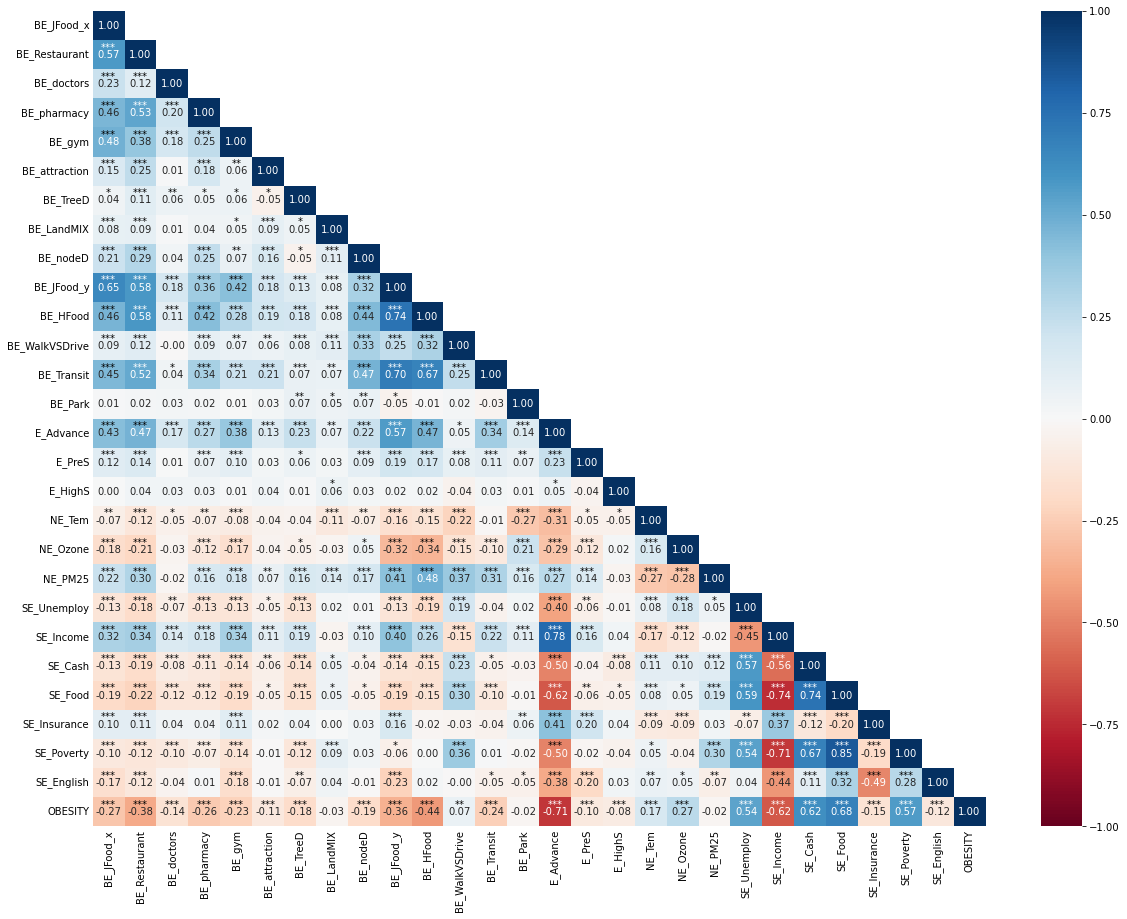

In [16]:
from scipy.stats import pearsonr
df_coor=data_Z.corr() 
fig = plt.figure(figsize=(20,15))
ax1 = plt.gca()


mask = np.zeros_like(df_coor)
mask[np.triu_indices_from(mask)] = True
mask2 = mask
mask = (np.flipud(mask)-1)*(-1)
mask = np.rot90(mask,k = -1)

im1 = sns.heatmap(df_coor,annot=True,cmap="RdBu"
, mask=mask # triangle format
,vmax=1,vmin=-1
, fmt='.2f',ax = ax1)

ax1.tick_params(axis = 'both', length=0)

# calculate P-value
df = data_Z
rlist = []
plist = []
for i in df.columns.values:
    for j in df.columns.values:
        r,p = pearsonr(df[i],df[j])
        rlist.append(r)
        plist.append(p)

rarr = np.asarray(rlist).reshape(len(df.columns.values),len(df.columns.values))
parr = np.asarray(plist).reshape(len(df.columns.values),len(df.columns.values))
xlist = ax1.get_xticks()
ylist = ax1.get_yticks()

widthx = 0
widthy = -0.15

for m in ax1.get_xticks():
    for n in ax1.get_yticks():
        pv = (parr[int(m),int(n)])
        rv = (rarr[int(m),int(n)])
        if mask2[int(m),int(n)]<1.:
            if abs(rv) > 0.5:
                if  pv< 0.05 and pv>= 0.01:
                    ax1.text(n+widthx,m+widthy,'*',ha = 'center',color = 'white')
                if  pv< 0.01 and pv>= 0.001:
                    ax1.text(n+widthx,m+widthy,'**',ha = 'center',color = 'white')
                if  pv< 0.001:
                    print([int(m),int(n)])
                    ax1.text(n+widthx,m+widthy,'***',ha = 'center',color = 'white')
            else: 
                if  pv< 0.05 and pv>= 0.01:
                    ax1.text(n+widthx,m+widthy,'*',ha = 'center',color = 'k')
                elif  pv< 0.01 and pv>= 0.001:
                    ax1.text(n+widthx,m+widthy,'**',ha = 'center',color = 'k')
                elif  pv< 0.001:
                    ax1.text(n+widthx,m+widthy,'***',ha = 'center',color = 'k')
plt.savefig(r'Z:\GJ\pearsonr\fig\Pearson_correlation.png',dpi=600)
plt.show()

In [17]:
ct2010

NameError: name 'ct2010' is not defined

In [13]:
plt.savefig('./Pearson_correlation.jpg')

<Figure size 432x288 with 0 Axes>